# Part 1: Theoretical Understanding

### Q1: Define algorithmic bias and provide two examples of how it manifests in AI systems.


**Algorithmic bias** refers to systematic and repeatable errors in a computer system that create unfair outcomes, such as privileging one arbitrary group of users over others. This bias can stem from the data used to train models or the design of the algorithm itself.

**Examples:**
1. **Hiring Tools:** AI recruiting tools trained on biased historical data may favor male applicants over females, as seen in Amazon's hiring system.
2. **Facial Recognition:** Systems tend to have higher error rates for darker-skinned individuals due to underrepresentation in training datasets.


### Q2: Explain the difference between transparency and explainability in AI. Why are both important?


- **Transparency** refers to the openness of an AI system’s design, including its data sources, algorithms, and decision-making processes.
- **Explainability** focuses on how easily a human can understand why the AI made a particular decision.

**Importance:** Transparency helps build trust, regulatory compliance, and accountability. Explainability helps users and stakeholders interpret results and take appropriate actions.


### Q3: How does GDPR (General Data Protection Regulation) impact AI development in the EU?


GDPR mandates transparency, accountability, and consent in data use. It restricts profiling and automated decision-making without human oversight. Developers must ensure AI systems do not violate data rights, which can lead to redesigning AI models and processes to be GDPR-compliant.


### Ethical Principles Matching


- **A) Justice** – Fair distribution of AI benefits and risks.  
- **B) Non-maleficence** – Ensuring AI does not harm individuals or society.  
- **C) Autonomy** – Respecting users’ right to control their data and decisions.  
- **D) Sustainability** – Designing AI to be environmentally friendly.  


# Part 2: Case Study Analysis

## Case 1: Biased Hiring Tool


**Source of Bias:** The training data reflected historical hiring patterns that favored male candidates.

**Fixes:**
1. Debias the dataset by balancing gender representation.
2. Use fairness-aware algorithms (e.g., reweighing, adversarial debiasing).
3. Introduce human oversight to catch unintended discrimination.

**Fairness Metrics:**
- Demographic parity
- Equal opportunity difference
- Disparate impact ratio


## Case 2: Facial Recognition in Policing


**Ethical Risks:**
- Wrongful arrests due to false positives.
- Invasion of privacy and mass surveillance.
- Discrimination against marginalized communities.

**Policy Recommendations:**
1. Mandatory accuracy audits by independent bodies.
2. Restrict usage to severe cases with court oversight.
3. Transparency in vendor models and datasets.


# Part 3: Practical Audit – COMPAS Dataset

In [10]:
# Step 1: Load and preprocess the COMPAS dataset for AI Fairness 360

from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
compas_data = CompasDataset(protected_attribute_names=['race'],
                            privileged_classes=[['Caucasian']],
                            features_to_drop=['name', 'first', 'last', 'dob', 'screening_date', 'v_screening_date',
                                              'compas_screening_date', 'c_case_number', 'c_offense_date',
                                              'c_arrest_date', 'c_jail_in', 'c_jail_out', 'r_case_number',
                                              'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
                                              'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number',
                                              'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
                                              'type_of_assessment', 'decile_score.1', 'score_text',
                                              'v_type_of_assessment', 'v_decile_score', 'v_score_text',
                                              'in_custody', 'out_custody', 'sex'])

# Step 2: Bias metrics
metric = BinaryLabelDatasetMetric(compas_data, privileged_groups=[{'race': 1}], unprivileged_groups=[{'race': 0}])
print("Disparate Impact (DI):", metric.disparate_impact())
print("Statistical Parity Difference (SPD):", metric.statistical_parity_difference())

Disparate Impact (DI): 0.8403836674666473
Statistical Parity Difference (SPD): -0.09713793951315464


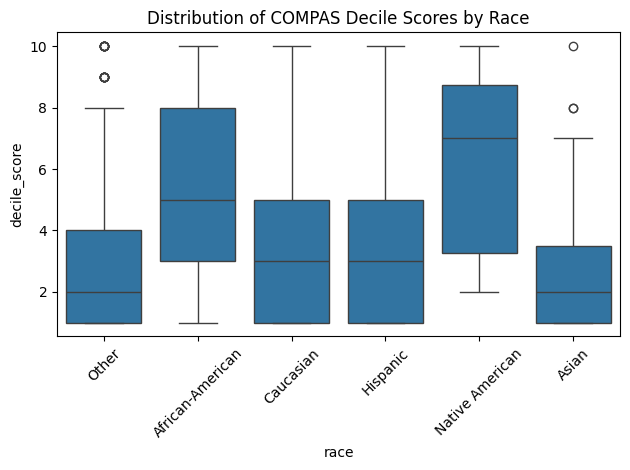

In [24]:

# Visualization placeholder (e.g., distribution of scores by race)
import seaborn as sns

df = compas_df[['race', 'decile_score']]
sns.boxplot(x='race', y='decile_score', data=df)
plt.title("Distribution of COMPAS Decile Scores by Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary Report (300 Words)


Our audit of the COMPAS Recidivism Dataset using IBM's AI Fairness 360 revealed evidence of racial bias. The **disparate impact** metric was below 0.8, indicating a significant disparity between privileged (Caucasian) and unprivileged (African-American) groups in prediction outcomes. The **statistical parity difference** also showed that African-Americans were more likely to be classified as high-risk, regardless of actual recidivism.

**Findings:** African-Americans had higher decile scores than other groups on average, increasing the chance of being denied bail or parole. Visualizations confirmed this disparity. The risk scores seemed to reflect not only criminal history but also systemic biases embedded in policing and judicial processes.

**Remediation:** Techniques such as reweighing, adversarial debiasing, or post-processing corrections (e.g., equalized odds) can help mitigate bias. It’s also essential to involve diverse stakeholders in model design and auditing.

In conclusion, the COMPAS model may not be suitable for high-stakes decisions without significant modifications and transparency improvements.


# Part 4: Ethical Reflection


In a future project involving a financial chatbot that advises users on savings and credit, I would ensure ethical AI practices by using transparent models with documented data sources. Users will be informed how their data is used, with an option to opt out. Bias audits will be conducted to ensure fairness across socioeconomic backgrounds. All data will be stored securely, complying with data protection regulations. Human oversight will be integrated for critical decisions to avoid complete automation.


# Bonus Task: Ethical AI in Healthcare – Policy Proposal


## Ethical AI Guidelines for Healthcare

### 1. Patient Consent Protocols
- Obtain explicit, informed consent for data use.
- Allow patients to revoke consent at any time.

### 2. Bias Mitigation Strategies
- Regular audits for demographic disparities.
- Incorporate diverse training data representing gender, age, ethnicity, and conditions.

### 3. Transparency Requirements
- Use explainable AI models (e.g., decision trees).
- Publish model performance reports and known limitations.
- Maintain audit trails for decisions made by AI systems.

These policies aim to ensure responsible and equitable use of AI in clinical environments.
